# Lab 2: Astronomical Imaging I 

*Gather round, for I shall tell a tale old as time. 
Long, long ago, astronomers gazed at the heavens, and with naught but their eyes, recorded the positions of the stars they saw there. 
Then, with the telescope, long, heavy contraptions which reached for the skies like an outstretched arm, (thanks, f/20 focal lengths)
they gazed through eyepieces in freezing domes, falling, on occasion, to their deaths from cages suspended at prime foci.* 

*Next came glass -- emulsion plates -- which upon extended exposure revealed upon their ghostly frames the splotches of stars and soon, galaxies and nebulae. 
Many a grad student, of course, spent their nights twiddling thumbs over micrometer dials to keep these stars in place. Manual guiding... this story teller shudders to imagine it.
And yet, even then, with permanent record, no measure could be made that weren't 'tween the eyes of an observer, peering at the glass through magnifying eyepiece, assigning grades of brightness and, amazingly, pretty much nailing the spectral classification of stars by their absorption features*. 

*And after this painstaking work, came the earliest CCDs, fractured by detector failures, riddled with readout noise, consumed by cosmic ray hits, laid low by low quantum efficiencies.* 

*Now... we use Python.* 


<hr>
Astronomical images are one of the basic building blocks of astronomical research. While we now obtain data in myriad ways, from gravitational waves to neutrinos, from spectra to polarimetry, the basic tenant of astronomy (and it's most recongizable public impact) is the images we make of the sky. 

That is why the first science topic we'll be tackling is imaging. And along the way, we'll learn how `astropy` makes our lives *so* much easier when dealing with images, and how to use robust functions to perform the analyses one might want to carry out on images (after we're done admiring their beauty). 

# If the glove `FITS`

Many of you are probably familiar with the `FITS` standard. It stands for `Flexible Image Transport System`, and for all intents and purposes, it acts as a container (much like a zip file). Within it, one can store several kinds of information: images (2d arrays of values), as the name implies, headers (dictionary like objects with metadata), and sometimes tabular data as well. A `FITS` file can contain any number of *extensions*, which just refer to "slots" where stuff is stored. Every "slot" has a `header` attribute and a `data` attribute. Thus, you could store a hundred astronomical images in 1 file, each with a different extension and a different header describing the image in that slot.  

```{tip}
Contextual clues are important when dealing with `FITS` files. Files that are explicitly single images almost always have the image stored in the 0th extension, while files that are explicitly table data tend to have the table stored in the 1st extension (with the 0th empty). 
```

The `FITS` standard is pretty old, and may be retired soon, but almost all ground based telescopes still use it for their native image output, so it behooves us to know how to get image data out of `FITS` files. 

## Problem 1: Loading a FITS file

Write a function which takes as its argument a `string` filepath to a `FITS` file, and should have an optional argument to set the extension (default 0). It should then load the given extension of that `fits` file using a [context manager](https://docs.astropy.org/en/stable/io/fits/index.html#opening-a-fits-file), and return a tuple containing the header and data of that extension. 

The function should have documentation that describes the inputs and outputs. Documentation is **incredibly important** when writing code, both in-line and (# comments) and at the top of functions, methods, and classes. 

In this class, we'll be using [Sphinx-compatible](https://www.sphinx-doc.org/en/master/) documentation written in the [Numpy/Scipy style](https://numpydoc.readthedocs.io/en/latest/format.html). There are several reasons to do this. 

1. It is a user-friendly and write-friendly, readable documentation format that is easy to add to your functions.
2. It can be rendered by Sphinx, the most popular automatic documentation renderer. If you've ever read the online documentation pages for functions in, e.g., numpy and scipy, those pages were rendered automatically based on the docstrings of the functions in question. This is possible with tools like Sphinx, but the documentation must be formatted correctly for this to work. 

In the cell below, I've provided a dummy function which takes in any number of inputs (mininum 3) and chooses a random input to return. The formatting of the documentation is shown there (as well as in the link above). 



In [5]:
import numpy as np 

def random_return(a,b,c,*args):
    '''
    A function which requires three inputs which are floats, accepts any number of additional inputs (of any kind), and returns one randomly chosen input. 
    
    Parameters
    ----------
    a: int
        description of this integer input
    b: int
        description of this integer input
    c: int
        description of this integer input
    *args: tuple
        any additional arguments get stored here
    
    Returns
    -------
    choice 
        The randomly selected input (type not specified)
    '''
    full_input_list = [a,b,c] + list(args)
    choice = np.random.choice(full_input_list)
    return choice

In [11]:
random_return(1,5,4,6,4,21,6)

6

When our function has been imported in some code, we can use the `help` command to see the documentation at any time:

In [9]:
help(random_return)

Help on function random_return in module __main__:

random_return(a, b, c, *args)
    A function which requires three inputs which are floats, accepts any number of additional inputs (of any kind), and returns one randomly chosen input. 
    
    Parameters
    ----------
    a: int
        description of this integer input
    b: int
        description of this integer input
    c: int
        description of this integer input
    *args: tuple
        any additional arguments get stored here
    
    Returns
    -------
    choice 
        The randomly selected input (type not specified)



You will also notice my use of `*args` in this function. This allows me to enter additional function arguments. Similar is `**kwargs`, which allows additional arguments tied to an input keyword. The former gets stored in a tuple, while the latter gets stored in a dictionary. We'll be using these a lot in class --- you can refresh or learn the basics in Section 2.8 of the chapter on functional programming [here](https://prappleizer.github.io/Tutorials/FunctionalProgramming/FunctionalProgramming_web.html).

So as a brief overview of documentation, it contains
1. A brief summary of the function 
2. The word Parameters with the next line having underlines of the same length
3. arguments, which are followed by a colon and the data type(s). On the next line, indented, descriptions of the arguments
4. The word Returns, with the same underline scheme
5. The returned objects, labeled the same way as the input. 

Also above, we saw how to format when no data type is specified. There, additional inputs could've been *any* data type, so we can't be sure what the output will be. The main thing we didn't cover is optional arguments. Those are set like this:
```
a: int, optional
    Description of the thing. (default 5)
```
So we mark it as optional, and then give the default for it. 

With that, you're ready to write and document your code below. **All functions you write in this class should have documentation**. 

In [10]:
from astropy.io import fits 
import os

# your code
def load_fits(...):
    '''

    '''
    pass

            

## Problem 2: Data I/O
### Problem 2.1
Using the function you created above, read in the header and data of the file `antenna_Rband.fits` which came with the lab assignment. 
```{note}
While this may seem small, the fact that your read-in is now one line instead of ~5 does improve your efficiency! But only if you use your function enough times to overcome the initial time spent writing it... 
We also have the flexibility to take our function and give it more features over time, which we will do in this class.

``` 

### Problem 2.2
Next, we need to plot the image data. There are several operations that we almost always perform when plotting astronomical data, as well as several user-preferences for how we "by default" plot images before we begin tweaking things. If you spend any time as an astronomer, you will plot quite literally *thousands* of images --- why set all these settings every time, when we can write a handy function to do it for us?

Write a function which takes in as input arguments 
- an image (2D array or masked array) 

as well as the following optional arguments (so set a default)
- figsize (default (15,13) )
- cmap (default 'gray_r')
- scale (default 0.5)
- \*\*kwargs (see [here](https://prappleizer.github.io/Tutorials/FunctionalProgramming/FunctionalProgramming_web.html))

Inside the function, create figure and axes objects using `plt.subplots()`. When working in notebooks, it is often useful to set the `figsize` argument of subplots to a nice large-ish value, such as `(15,13)`, which will make the image fill most of the notebook. Since *your* function has set figsize as an argument, you can feed `figsize` directly into the `subplots` call, so that a user of the function can leave the default or set their own. 

Next, use `ax.imshow()` to actually plot the image. You'll want to save the output of this, e.g., `im = ax.imshow(...)`. In this plotting call, set `imshow`'s argument `origin='lower'`. We *always* want to do this when dealing with imaging, as we want (0,0) to be a coordinate. 
```{note}
By default, matplotlib uses a "matrix-style" plotting, where 0 of the y axis is in the *top* left corner, and 0 of the x axis is in the *bottom* left corner.
```
Also within the call to `imshow()`, feed in the cmap from your function (i.e., `cmap=cmap`). The other critical `imshow()` arguments are `vmin` and `vmax`, which sets the saturation points (and thus the contrast) of the image. 

We haven't set `vmin` and `vmax` as arguments of our outer function, but because of `kwargs`, we can still create a default here that can be overriden from outside. 

As a default, within your function, calculate the mean and standard deviation of the image. Set some temporary variables with the quantities `mu - scale*sigma` and `mu + scale*sigma` (where here `mu` is the calculated mean and `sigma` is the calculated std dev, and `scale` was the optional input). Next, check the kwargs dictionary (which will exist in your function because we added the packing argument `**kwargs` to our function. IF `vmin` and `vmax` are in this dictionary, plug those into your imshow command. Otherwise, use the values determined by the calculation above. Bonus point for accomodating either no vmin/vmax entered, just vmin or vmax, or both (using the calculated values when things aren't provided). 

Your function should **return** the created `fig` and `ax` objects so the user can continue to tweak them.

Run your function and test its outputs. Once you're satisfied it's working, use it to plot the provided data. Find either a vmin/vmax pair, or a choice of `scale` which makes the image look pretty!

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Your code
def implot(...):
    ''' 
    WRITE DOCSTRING HERE
    '''
    pass #replace with your code

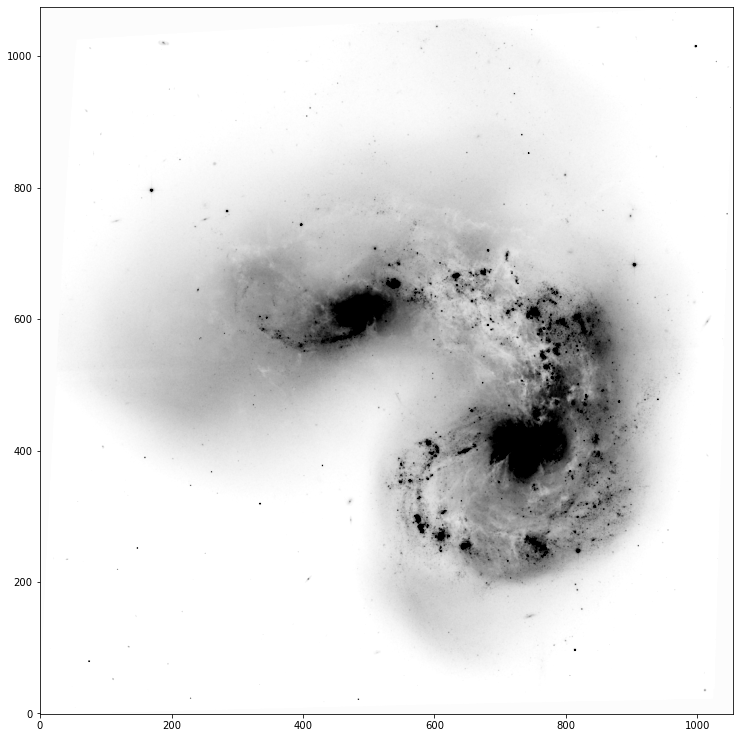

In [42]:
# I've included my output below for your comparison. Overwrite it with your own! 

### Problem 2.3

Copy your function down, we're going to keep messing with it. 

So far, we've made it so that with a simple function call and, potentially, with just the input of an image array, we get out a nice plot with a scaling, colormap, and origin selection. In this section, we are going to allow (optionally) for a colorbar to be added to the figure. We're also going to add in the ability for the figure to be plotted in celestial coordinates (i.e., RA and DEC) instead of pixel units, if information about the image (via the world coordinate system, WCS) exists in the image header. 

```{note}
Generally, WCS information is present in the headers of *published* images like the one here, but *not* present in raw data gathered at the telescope. This is because images need to undergo a process known as *plate solving* to determine both the direction (coordinates) toward the image, as well as the pixel scale (i.e., how many arcseconds per pixel in the image). 
```

Add three new optional arguments to your function.
- colorbar = False
- header = None
- wcs = None

Let's start with the colorbar. At the end of your plotting commands, check if `colorbar=True`, and if so, create a colorbar via `plt.colorbar()`, setting the `mappable` argument to whatever you saved the output of `ax.imshow()` into above. Also set the `ax` argument to be your ax; this will tell `matplotlib` to steal a bit of space from that axis to make room for the colorbar. 




In [46]:
# Your code

```{tip}
When I do this, the colorbar is matching the figure height, rather than the axis height. If that bugs you like it bugs me, check out [this solution](https://stackoverflow.com/a/33505522) from StackOverflow, which you can adapt within your function to make the cbar match the axis height.
```

In order to plot in RA and DEC coordinates, we need to first have an `astropy` `WCS` object associated with the image in question. You can import `WCS` from `astropy.wcs`. WCS objects are created from the headers of plate-solved fits files. In our function, we allow the user to input either a header or a WCS object directly. More on WCS can be found in the lecture notes, or [here](https://docs.astropy.org/en/stable/wcs/index.html).

Within your function, check if a wcs is input -- if it is, we're good to go and can safely ignore `header` (even if it is provided). If instead only `header` is provided, use the `WCS()` function to create a new wcs object from that header. 
```{tip}
You'll want to do this at the very top of your function.
```

We now need to move our `fig, ax = ....` creation line into an if-statement. If we are using WCS "stuff", you'll need to set a `projection` for your plot that uses the wcs. This is accomplished as follows:

```
fig, ax = plt.subplots(...,subplot_kw={'projection':wcs}) 
```
where `wcs` is whatever you've named the output of `WCS(header)` or is the WCS input directly into the function. 



In [4]:
from astropy.wcs import WCS

# your code

```{warning}
In this case, we will get an error from our function that happens because of some distortion coefficient nonsense between astropy and drizzled HST images. Since it's not pertinent to our lab, I'm providing below a snippet of code you should use to fix your header before running `WCS(header)`. 
```

In [203]:
def strip_SIP(header):
    A_prefixes = [i for i in header.keys() if i.startswith('A_')]
    B_prefixes = [i for i in header.keys() if i.startswith('B_')]
    for a,b in zip(A_prefixes,B_prefixes):
        del header[a]
        del header[b]
    return header

If this worked correctly, when you add the header you read in from our image, you should now see the axes of your plot change from pixels to `pos.eq.ra` and `pos.eq.dec`. We're now looking at actual on-sky coordinates! Yay!

### Problem 2.4 
Within the if-blocks of your function that sets the `ax` to be a wcs projection, set the $x$ and $y$ labels to read "Right Ascension \[hms\]" and "Declination \[degrees\]" in fontsize 15.

Lastly, to polish things off, use `ax.tick_params()` to set inward, larger ticks, and increase the axis tick label size to 15. 

```{note}
You'll notice (especially with larger ticks) that the are not perpendicular to the axes spines. This is because this particular image has been rotated with respect to the standard celestial coordinate axes. This can be seen more clearly if you add the following to your function:
`ax.coords.grid(color='gray', alpha=0.5, linestyle='solid')`. Try doing that, adding an optional keyword to your function called 'grid' and enabling this command if it is set.
```

```{tip}
To check if a condition is true (e.g, `if condition == True:`), you can just type `if condition:`
```

It's taken us some time, but this image could now be placed in a scientific publication. And, since we have a handy function for it, we can make images that look this nice on the fly with a short one line command, yet still have a lot of flexibility over many important inputs. And of course, the figure and axes objects are returned, so one could run this function and then continue tweaking the plot after the fact.

```{note}
As a final note, I want to draw your attention to the fact that once you use the `wcs` projection on some plot, it's no longer a normal ax object, it's a wcsax object. This makes changing certain elements of those axes a little more involved than for a standard one. I use [this page](https://docs.astropy.org/en/stable/visualization/wcsaxes/ticks_labels_grid.html) and the others linked there when doing so. 
```

## Problem 3: Cutouts and Aperture Photometry

When working with astronomical images, like the one we've been using in this lab, it is often advantageous to be working with a cutout -- a chunk of the image centered on a certain coordinate, and of a certain size. For example, if there is an HII region or star cluster of interest in the above image, we may like to zoom in on it to examine it more closely. 

Now that we've switched over to using celestial coordinates instead of pixels as our projection frame, zooming in on a region is not as simple as slicing our array, e.g., `image[500:700,200:550]`. On the plus side, the framework we'll learn here is very robust, and will allow for all sorts of useful measurements. 


To make a cutout, we'll need the `Cutout2D` module within `astropy`, which I'll import below. To provide the position of the cutout, we need to be able to feed in astronomical coordinates. For this, we'll use `SkyCoord`, a module in `astropy.coordinates`. Finally, we'll need to integrate the `units` module in `astropy` to successfully create coordinate objects.

In [100]:
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
import astropy.units as u

Let's start with a `SkyCoord` object. There are several coordinate systems used in astronomy, e.g., Galactic coordinates ($b$, $l$), Equatorial ($RA$, $DEC$). The most common (especially in any extragalactic setting) is RA and DEC (as you can see in the image you've plotted already). 

The [documentation](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html) for `SkyCoord` is solid, and worth reading. 

The general way we create these objects is, e.g.,

In [103]:
coord = SkyCoord('12:01:53.6 -18:53:11',unit=(u.hourangle,u.deg))

```{tip}
You can input various types of strings and formattings for the coordinates, just be sure to specify the units as shown above. The documentation shows the various methods.
```

### Problem 3.1

In this case, the coordinates I set above are for NGC 4039, which is the smaller of the two galaxies in the image we're using. 

```{note}
If at any point you're trying to make a coordinate object for a well known galaxy/object, try, e.g., `coord = SkyCoord.from_name('NGC 4038')`, and ususally that will work!
```


In the cell below, use the coordinate we've created, plus a size (use 1x1 arcminutes), and the wcs object for our image, to create a `Cutout2D` object. 

In [106]:
#cutout = # your code here

Now, use your fancy new function to plot the new cutout. 
```{note}
Cutout objects contain the image and their own wcs, accessible via, e.g., `cutout.data` and `cutout.wcs`. 
```


In [ ]:
# plot it

### Problem 3.2

We're now going to do some aperture photometry. 
```{admonition} Definition
Aperture Photometry is the process of defining a region on an image (generally, but not always circular), and measuring the sum pixel value within that region. The region is known as an aperture, and the "collapsing" of the 2D spatial information about counts in each pixel into a single number is known as photometry.
```

Below, I provide a new coordinate, this time centered on the region between the two galaxies. Make a new cutout of that region (again, 1x1 arcmin), and plot it.

In [120]:
new_coord = SkyCoord('12:01:55.0 -18:52:45',unit=(u.hourangle,u.deg))

In [121]:
# your code


In [5]:
#plot it

In this region, there are a lot of blobby looking roughly circular sources --- Some of the larger ones are HII star forming regions, the smaller ones are likely stars. Later in this lab, we'll use multi-wavelength data to try to suss out what is what. 

Often, for calibration purposes, we'd need to create apertures around all those sources in the image. We definitely don't want to do that by hand! Instead, we're going to use the `sep` package. 

```{note}
Simply `pip install sep` inside your `a330` environment terminal to get it installed, you should then be able to import it.
```



In [123]:
import sep

There are three steps to performing aperture photometry with `sep`, which are detailed in [it's documentation](https://sep.readthedocs.io/en/v0.4.x/). 

- Estimate the background 
- Find Sources 
- Perform Aperture Photometry

Using the instructions presented in the documentation linked, measure the background of the cutout image, and run the source extractor on it. Don't forget to subtract the background before running the extractor!

To do this, write a function that takes as input the data (in this case, a `cutout.data` object and a threshold scale (to be multiplied by the `globalrms`, and performs these steps, returning the `objects` array. Don't forget to document it!

```{hint}
:class: dropdown
I used a threshold value of 2.0, and got ~100 objects. 
```

```{warning}
When I ran this, I got an error that my "array was not C-contiguous." I found the solution to this issue in [this stackoverflow post](https://stackoverflow.com/a/26782930). Loosely, `sep` uses C-bindings to actually run the heavy lifting code in C rather than Python (it's faster). This means input arrays must be arranged in physical memory the way C is used to. This particular array was not, but it is easy to order it this way.
```

In [173]:
# Your code

def run_sep(...):
    '''
    DOCSTRING HERE 
    '''
    pass

Run your function and store the output in a variable called `objects`. You should now have an object array containing many detected sources.

In [ ]:
# run func

The positions of the determined sources are stored in the output structured array and can be indexed with, e.g., `objects['x']` and `objects['y']`. Replot your image of the cutout, but now circle the positions of all your detected sources. Do they line up with actual point sources in the image?

```{hint}
:class: dropdown
Try using ax.plot, setting your symbol to 'o', your color to 'None', your marker edge color (mec) to some color, and the marker size (ms) to some largeish value, for a quick way to circle objects.
```

In [ ]:
# Your code

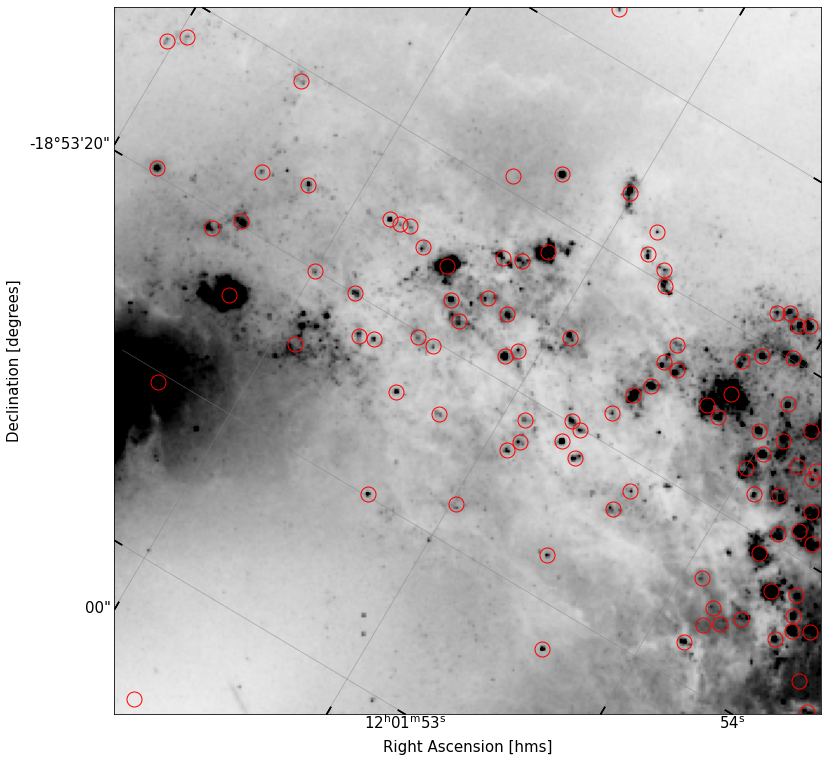

In [167]:
# Here's my image, for comparison 

It looks like we've done a pretty adequate job finding the sources in this field -- there'a a few that got missed, and a few we might want to remove, but overall, this is pretty solid. 

We need to start working with these objects we've found. While `sep` can perform aperture photometry itself (reading the docs, you can see it is simple to feed in the objects and a pixel radius), we're going to be a bit more careful about things. To better visualize and work with this data, I'd like it to be a `pandas` `DataFrame`. We're going to be using those a lot in this course. Converting a `numpy` structured array to a dataframe is simple: I provide the code below. Run it, and then simply type `df` in a new cell to see a nicely formatted pandas table of our objects.

In [171]:
import pandas as pd
df = pd.DataFrame(objects)

In [ ]:
df #run this

With `sep` providing the first pass, we can cull a few objets from our sample that very clearly are not star forming regions. Using your DataFrame, plot the flux of each detected object using the `flux` column. You should have at least a few that are huge outliers, with dramatically more flux the rest. 

In [6]:
# plot

Write a function called `remove_outliers` that reads in a dataframe and a flux-min and flux-max. It should filter the dataframe to only include fluxes between the input values, and return the new dataframe. Then use this function on your data, choosing an appropriate cutoff.

In [182]:
# Your Code 

def remove_outliers(...):
    '''
    '''
    pass

In [183]:
# run the function

In [7]:
# plot again

Re-plot the set of sources you have now, over the data.

In [8]:
# plot

You should see that some of the circles which were over bright parts of the galaxy are no longer here. 
```{note}
You may find that there are some visible sources which, despite tinkering, don't get caught by `sep`. That's okay -- if we really wanted them, we could just go in and put down apertures by hand. Generally when performing a step like this in the field, we have a pre-determined set of points to use, because we have measured fluxes for them, and wish to flux calibrate our data. 
```

## Problem 4: Continuum Subtraction 

At this point, we have the tools necessary to make flux measurements in apertures (at least, via `sep` -- we will also learn how to do this with the `photutils` package). However, $R$ band photometry of HII regions is not exceedingly interesting. More interesting is the flux in $H\alpha$, an emission line caused by Hydrogen recombination. This line (at 6563 Angstrom) is located *within* the $R$ band, and is imaged using a narrow filter compared ot $R$. 

The flux measured by an $H\alpha$ filter contains both the flux from the emission line as well as the underlying continuum --- essentially, the starlight from the galaxy. If we can get a clean measure of the flux in $H\alpha$ (sans this continuum), we can make a direct estimate of the star formation rate of the system. 

### Problem 4.1
To do this, we need to access an $H\alpha$ image, and then subtract off the continuum present (which we'll infer from our $R$ band image). Located in the lab directory is a file called `antenna_Haband.fits`. Use your fits loader function from above to read in this new image, create an equivalent sized and centered cutout to the $R$ band data, and plot it, with the same sources found in the $R$ band circled. 

In [9]:
# Your Code

There's a few interesting things to note right away here. Looking just north of the center of the image, there's now a large amount of flux in $H\alpha$ coming from some blobs which do not appear in the $R$ band. This is likely due to the fact that by zero-ing in on the ionized gas, we can see the large envelopes of gas being lit up by the star formation in this region. 
```{note}
The active merger scenario between these two galaxies is triggering a lot of star formation.
```

### Problem 4.2

To get a better idea of how the $H\alpha$ flux compares to the $R$ band distribution, use the `plt.contour()` tool to measure contours of $H\alpha$, drawing them over the 
$H\alpha$ image and tweaking the levels until you think you are well tracing the distribution. Then, plot those contours over the $R$ band data instead. 

```{hint}
It is often beneficial to use `np.logspace()` when defining contour levels, as it allows you to cover large dynamic range with fewer contours. You may also find it helpful to set your contour `alpha` to something < 1, to better see both the image underneath and the contours.
```

In [10]:
# Your Code

To help guide you, I've shown what I got for my plot below --- you need not emulate it exactly. The blue box shown in the image will be useful to you in the next part of the problem.

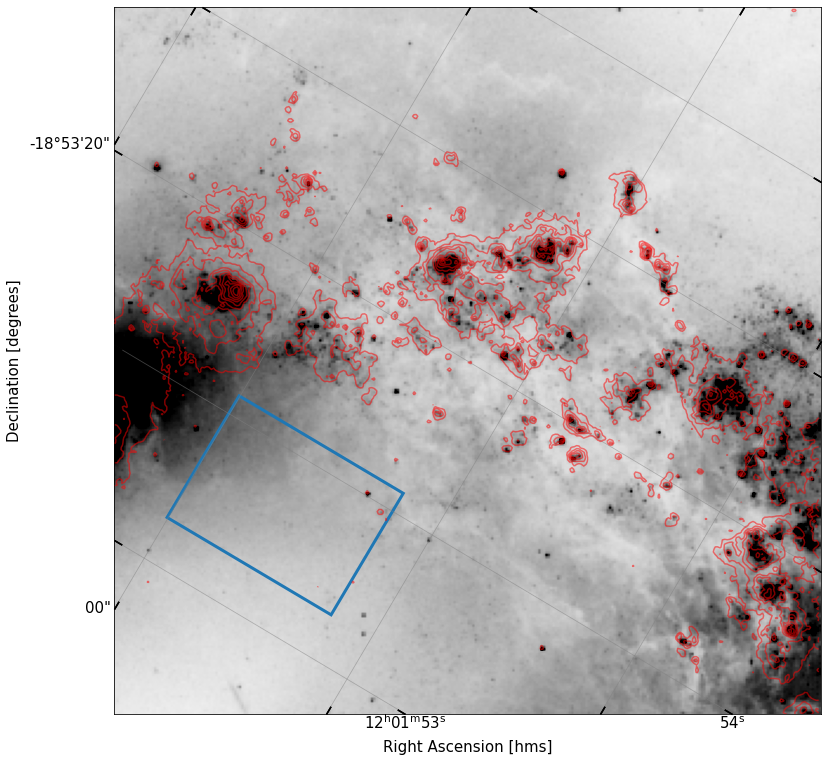

In [267]:
# My solution

We can now see things a lot more clearly! It is obvious that the $H\alpha$ contours trace some of the sources we were seeing in the $R$ band, but that the gas is more extended around these clusters of sources, as we might expect.

### Problem 4.3
We must now attempt a continuum subtraction of the data. We can't simply subtract the $R$ band from the $H\alpha$ band, because the $R$ band filter is much wider, and thus for similar exposure times, collects many more photons than the narrower $H\alpha$ filter. Ideally, one could use a set of foreground stars (which are pure continuum sources in both images) to measure fluxes in both, and find a scaling constant. Here, all of the sources we see in this image are most likely actually HII regions. This means if we use them to scale between our images, we will likely oversubtract true flux. 

Instead, what I'm going to do here (which may be slightly sketchy), is pick a "blank" region of continuum emission from the $R$ band which has no $H\alpha$ contours, and assert that this patch must have the same flux in both images. In the picture above, I indicated a blue rectangular patch on the sky. This is what we'll be using to measure our continuum-to-narrowband ratio. 

To make this patch, we're going to use `SkyRectangularAperture`, from `photutils`. You can pip install `photutils` in your `a330` environment if you don't have it. Then do the following imports:

In [268]:
from photutils.aperture import SkyRectangularAperture
from photutils.aperture import aperture_photometry

As shown in [it's documentation](https://photutils.readthedocs.io/en/stable/api/photutils.aperture.SkyRectangularAperture.html), we need to feed in a `SkyCoord` position, as well as a width and a height. 
I've provided the new coordinate to use below. 

Create a rectangle of your own, measuring $0.27''$ by $0.2''$. You can now use the `aperture_photometry()` function to measure the flux in your aperture, applied to a certain image. Using the [documentation](https://photutils.readthedocs.io/en/stable/api/photutils.aperture.aperture_photometry.html#photutils.aperture.aperture_photometry) as needed, find the flux in this box for both the $R$ band and $H\alpha$ band data, and then determine the ratio between those values. Don't forget about the `wcs`!

In [11]:
patch_cent = SkyCoord('12:01:53.7 -18:52:52',unit=(u.hourangle,u.deg))

# Your code


We can now use this ratio to perform our subtraction. 

### Problem 4.4
Now, fill in the function below, which should read in your rectangular patch, the $R$ band image, and the $H\alpha$ image. Within the function, copy in the code that determines the ratio, and then use the ratio you found to scale your $R$ band image, then subtract it from the $H\alpha$ image. The function should return this new image array.

Plot up your continuum subtracted image using your `implot()` function, adding back in the apertures we found earlier and the contours we made from the full $H\alpha$ image.

In [12]:
# your code
def continuum_subtract(...):
    '''
    DOCSTRING HERE
    '''
    pass 

What do you notice about the distribution of apertures with respect to the distribution of $H\alpha$ gas? Is there a strong alignment of the $R$ band sources and the gas? What does this imply about most of the $R$ band sources?



*Answer here*

### Problem 4.5 

Lastly, let's load up the $B$ band image. As you probably know, the $B$ band traces bluer light, and thus will more preferentially see young, hot stars (whereas the $R$ band traces the main sequence and turn off stellar distribution). 

Load up the `antenna_Bband.fits` image, make a cutout, and plot it below. Use your `load_fits()` function and your `implot()` function. Make a new set of countours from your *continuum subtracted* $H\alpha$ data, and overplot that onto the $B$ band data. What do you see?


In [13]:
# Your code

In my own image, there are some clusters of $B$-band flux that align well with the $H\alpha$ contours, and some $B$ band sources out on their own. It is unsurprising that there is a correspondance between them; excess in $B$ light implies the prescence of UV radiation as well, from young O/B stars. It is this radiation responsible for ionizing the gas that is shining in $H\alpha$, so the $H\alpha$-emitting gas should be loosely clustered around sources bright in the $B$ band (the experiment would be even cleaner if we used, say, *GALEX* FUV data). 

### Bonus Question (up to 3 points)

If you want to take your analysis farther, try measuring some fluxes off of your continuum subtracted $H\alpha$ data, placing several manual apertures down over the regions of highest $H\alpha$ concentration (which also align with $B$ band concentrations). 

The measures you get from this will be in counts on the detector. We need to convert these counts into flux units (e.g., erg s$^{-1}$ cm$^{-2}$). To do this, 
- pull the 'PHOTFLAM' keyword from the header of your $H\alpha$ data
- also pull the 'EXPTIME' value from the header. 

Start by taking your fluxes in counts, multiplying by the `PHOTFLAM` value, and dividing by the `EXPTIME` value. This puts you in erg s$^{-1}$ cm$^{-2}$ *per Angstrom*. Thus, what we have is technically a *flux density*. To convert to a true flux, we'll simply integrate over the bandpass... but for this example, let's assume a constant flux across the bandpass, which for the ACS 658N filter ($H\alpha$), is 136.27 angstroms. 

Once you have fluxes, use the distance to NGC 4038/9 to determine the luminosity in erg/s of your collective set of sources, and then use the $SFR(H\alpha)$ calibration of [Kennicut & Bell](https://iopscience.iop.org/article/10.1086/319025/fulltext/52481.text.html) to convert to an SFR. How does your answer compare to, e.g., 
- The SFR of the Milky Way?
- The SFR of the Orion Nebula?
- The SFR of the Tarantula Nebula?